<a href="https://colab.research.google.com/github/saeidsaadatigero/Training_AI_ML/blob/main/12_PyTorch_%2B_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1, Loss: 0.2271
Epoch 2, Loss: 0.0732
Test Accuracy: 97.98%


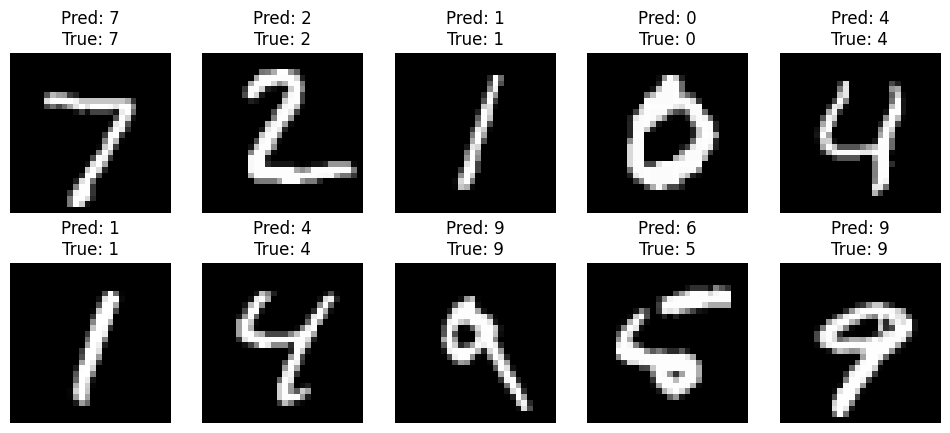

In [3]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# --- 1. Transform: تبدیل تصاویر به Tensor و نرمالیزه کردن ---
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# --- 2. Load MNIST ---
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# --- 3. تعریف مدل ساده CNN ---
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16*14*14, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16*14*14)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

# --- 4. Loss و Optimizer ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- 5. Training ---
epochs = 2  # برای دست‌گرمی فقط 2 epoch
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

# --- 6. تست مدل و Accuracy ---
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

# --- 7. نمایش چند نمونه پیش‌بینی ---
dataiter = iter(test_loader)
images, labels = next(dataiter)   # ✅ تغییر داده شد

outputs = model(images)
_, preds = torch.max(outputs, 1)

fig, axes = plt.subplots(2, 5, figsize=(12,5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(f"Pred: {preds[i].item()}\nTrue: {labels[i].item()}")
    ax.axis('off')
plt.show()